# **Machine learning assignment**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/laptop_prices.csv')

In [ ]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


# **Task_a : Identifying the top 5 laptop brands by the number of products listed**

In [ ]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,152
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [ ]:
Top_5_brands= df['Company'].value_counts().head(5)
print(Top_5_brands)

Company
Dell      291
Lenovo    289
HP        268
Asus      152
Acer      101
Name: count, dtype: int64


Answer_a: From above, It is evident that - Dell, Lenovo, HP, Asus, Acer are the top 5 laptop brands by the number of products listed

# **Task_b : Finding the average price of laptops for each brand and Identifying which brand has the highest and lowest average price**

In [ ]:
brand_group= df.groupby('Company')['Price_euros']
print(brand_group.mean()) # shows average price of laptop for each brands

Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64


In [ ]:
print(brand_group.mean().sort_values(ascending=False))

Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price_euros, dtype: float64


In [ ]:
highest_avg_price_brand=brand_group.mean().idxmax(),brand_group.mean().max()
print(highest_avg_price_brand)

('Razer', 3346.1428571428573)


In [ ]:
lowest_avg_price_brand=brand_group.mean().idxmin(),brand_group.mean().min()
print(lowest_avg_price_brand)

('Vero', 217.425)


Answer_b: From above, It is evident that - Razer is the laptop brand  which average price is highest i.e. 3346.14 (approx) and Vero is the laptop brand  which average price is lowest i.e. 217.425

# **Task_c : Presenting the correlation between Price_euros and other numeric features such as CPU_freq, Ram, Inches, and Weight and Identifying which features are most correlated with price.**

In [ ]:
corr_df= pd.DataFrame()
for col in df.columns:
  if df[col].dtype != 'object':
    corr_df= pd.concat([corr_df,df[col]],axis=1)
corr_df

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0
1,13.3,8,1.34,898.94,1440,900,1.8,128,0
2,15.6,8,1.86,575.00,1920,1080,2.5,256,0
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0
...,...,...,...,...,...,...,...,...,...
1270,14.0,4,1.80,638.00,1920,1080,2.5,128,0
1271,13.3,16,1.30,1499.00,3200,1800,2.5,512,0
1272,14.0,2,1.50,229.00,1366,768,1.6,64,0
1273,15.6,6,2.19,764.00,1366,768,2.5,1024,0


In [ ]:
correlation_matrix= corr_df.corr()
print(correlation_matrix)

                    Inches       Ram    Weight  Price_euros   ScreenW  \
Inches            1.000000  0.245009  0.827339     0.070091 -0.063748   
Ram               0.245009  1.000000  0.389370     0.740287  0.424089   
Weight            0.827339  0.389370  1.000000     0.211883 -0.028605   
Price_euros       0.070091  0.740287  0.211883     1.000000  0.552491   
ScreenW          -0.063748  0.424089 -0.028605     0.552491  1.000000   
ScreenH          -0.089128  0.415241 -0.050106     0.548529  0.994069   
CPU_freq          0.303115  0.366254  0.318649     0.428847  0.178659   
PrimaryStorage    0.266892  0.015365  0.175433    -0.124775 -0.072977   
SecondaryStorage  0.390661  0.390939  0.481495     0.291207  0.146232   

                   ScreenH  CPU_freq  PrimaryStorage  SecondaryStorage  
Inches           -0.089128  0.303115        0.266892          0.390661  
Ram               0.415241  0.366254        0.015365          0.390939  
Weight           -0.050106  0.318649        0.1754

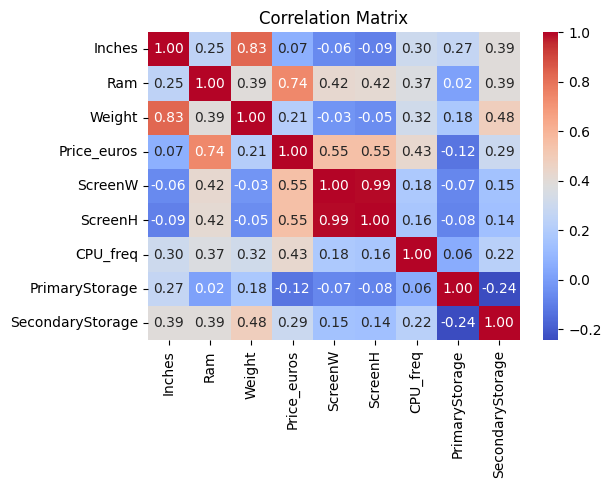

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show();

In [ ]:
correlation_matrix['Price_euros']

,Price_euros
Inches,0.070091
Ram,0.740287
Weight,0.211883
Price_euros,1.000000
ScreenW,0.552491
ScreenH,0.548529
CPU_freq,0.428847
PrimaryStorage,-0.124775
SecondaryStorage,0.291207


Answer_c : From above, It is evident that - Ram of laptop is mostly correlated with laptop price. On the other hand, Screen size (Inches) is less correlated with laptop price. ScreenW and ScreenH , both have same proportioal amount of relationship with price.

# **Task_d : Creating a new feature, Storage Total, by summing Primary Storage and Secondary Storage.**

In [ ]:
df['Storage_total']= df['PrimaryStorage']+df['SecondaryStorage']
df['Storage_total']

,Storage_total
0,128
1,128
2,256
3,512
4,256
...,...
1270,128
1271,512
1272,64
1273,1024


In [ ]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Storage_total
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,128
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,128
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,256
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,512
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,256


Answer_d : From above, It is evident that - storage toatal column, which is the sum of primary and secondary storage, added to main data frame and total column number increased from 23 to 24

# **Task_e : Building a regression model using features like Ram, Inches, CPU_freq, PrimaryStorage, and GPU_company to predict the Price_euros of a laptop. Need to suggest the best regression model**

In [ ]:
df= pd.read_csv('/content/laptop_prices.csv')

In [ ]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
df.shape

(1275, 23)

In [ ]:
df.drop(['Product','TypeName','ScreenH','GPU_model'],axis=1,inplace=True) # as ScreenH and ScreenW has same relation with price, so one of them can be  dropped

In [ ]:
df.shape

(1275, 19)

In [ ]:
df.isnull().sum()

,0
Company,0
Inches,12
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0
Touchscreen,589
IPSpanel,0


In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(col, df[col].value_counts())
    print()

Company Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

OS OS
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

Screen Screen
Full HD        835
Standard       369
4K Ultra HD     43
Quad HD+        28
Name: count, dtype: int64

Touchscreen Touchscreen
No     584
Yes    102
Name: count, dtype: int64

IPSpanel IPSpanel
No     918
Yes    357
Name: count, dtype: int64

RetinaDisplay RetinaDisplay
No     1258
Yes      17
Name: count, dtype: int64

CPU_company CPU_company
Intel      1214
AMD          60
Samsung       1
Name

In [ ]:
df.drop(['Touchscreen','RetinaDisplay','CPU_company','CPU_model','SecondaryStorageType'],axis=1,inplace=True)

In [ ]:
df.shape

(1275, 14)

In [ ]:
df.isnull().sum()

,0
Company,0
Inches,12
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0
IPSpanel,0
CPU_freq,0


In [ ]:
avg_Inches= df['Inches'].mean()
df['Inches']= df['Inches'].fillna(avg_Inches)

In [ ]:
df.isnull().sum()

,0
Company,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0
IPSpanel,0
CPU_freq,0


In [ ]:
df.head()

,Company,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,IPSpanel,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,GPU_company
0,Apple,13.3,8,macOS,1.37,1339.69,Standard,2560,Yes,2.3,128,0,SSD,Intel
1,Apple,13.3,8,macOS,1.34,898.94,Standard,1440,No,1.8,128,0,Flash Storage,Intel
2,HP,15.6,8,No OS,1.86,575.00,Full HD,1920,No,2.5,256,0,SSD,Intel
3,Apple,15.4,16,macOS,1.83,2537.45,Standard,2880,Yes,2.7,512,0,SSD,AMD
4,Apple,13.3,8,macOS,1.37,1803.60,Standard,2560,Yes,3.1,256,0,SSD,Intel


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Company,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,IPSpanel,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,GPU_company
0,1,13.3,8,8,1.37,1339.69,3,2560,1,2.3,128,0,3,2
1,1,13.3,8,8,1.34,898.94,3,1440,0,1.8,128,0,0,2
2,7,15.6,8,4,1.86,575.00,1,1920,0,2.5,256,0,3,2
3,1,15.4,16,8,1.83,2537.45,3,2880,1,2.7,512,0,3,0
4,1,13.3,8,8,1.37,1803.60,3,2560,1,3.1,256,0,3,2


In [ ]:
X = df.drop('Price_euros', axis = 1)
Y = df['Price_euros']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, Y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Y_train_pred = model_lr.predict(X_train_scaled)
Y_test_pred = model_lr.predict(X_test_scaled)

print("Train R2 Score (Linear Regression): ")
print(r2_score(Y_train, Y_train_pred))

print("Test R2 Score (Linear Regression): ")
print(r2_score(Y_test, Y_test_pred))
print('')
print('')
print("Train MSE Error (Linear Regression): ")
print(mean_squared_error(Y_train, Y_train_pred))

print("Test MSE Error (Linear Regression): ")
print(mean_squared_error(Y_test, Y_test_pred))


Train R2 Score (Linear Regression): 
0.7044704479839897
Test R2 Score (Linear Regression): 
0.6782988613104499


Train MSE Error (Linear Regression): 
143652.86971193558
Test MSE Error (Linear Regression): 
162064.95664542884


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=500)
model_rf.fit(X_train_scaled, Y_train)

RandomForestRegressor(n_estimators=500)

In [ ]:
Y_train_pred = model_rf.predict(X_train_scaled)
Y_test_pred = model_rf.predict(X_test_scaled)

print("Train R2 Score (Random Forest Regression): ")
print(r2_score(Y_train, Y_train_pred))

print("Test R2 Score (Random Forest Regression): ")
print(r2_score(Y_test, Y_test_pred))
print('')
print('')
print("Train MSE Error (Random Forest Regression): ")
print(mean_squared_error(Y_train, Y_train_pred))

print("Test MSE Error (Random Forest Regression): ")
print(mean_squared_error(Y_test,Y_test_pred ))

Train R2 Score (Random Forest Regression): 
0.9737957875545427
Test R2 Score (Random Forest Regression): 
0.7786307225782071


Train MSE Error (Random Forest Regression): 
12737.508958587097
Test MSE Error (Random Forest Regression): 
111520.2839944382


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [ ]:
model_poly_lr = LinearRegression()
model_poly_lr.fit(X_train_poly, Y_train)

LinearRegression()

In [ ]:
Y_train_pred = model_poly_lr.predict(X_train_poly)
Y_test_pred = model_poly_lr.predict(X_test_poly)

print("Train R2 Score (Polynomial Regression): ")
print(r2_score(Y_train, Y_train_pred))

print("Test R2 Score (Polynomial Regression): ")
print(r2_score(Y_test, Y_test_pred))
print('')
print('')
print("Train MSE Error (Polynomial Regression): ")
print(mean_squared_error(Y_train, Y_train_pred))

print("Test MSE Error (Polynomial Regression): ")
print(mean_squared_error(Y_test, Y_test_pred))

Train R2 Score (Polynomial Regression): 
0.9449143854119354
Test R2 Score (Polynomial Regression): 
-2792807134478.154


Train MSE Error (Polynomial Regression): 
26776.36318073684
Test MSE Error (Polynomial Regression): 
1.406946114683152e+18


Answer_e : From above, It is evident that, **Linear regressor** works overall better than, Random forest regressor and polynomial feature regressor condering both performance metrics (R2 score and MSE error) of train and test data prediction at a time.

# **task f:Creating a classiﬁcation model to predict the laptop type (TypeName) based on features such as Inches, Ram, PrimaryStorage, and Weight. Identify which features are the most important in your classiﬁcation model. Suggest the best classiﬁcation model**

In [ ]:
ds= pd.read_csv('/content/laptop_prices.csv')

In [ ]:
ds.drop(['Product','Screen','Touchscreen','RetinaDisplay','CPU_company','CPU_model','SecondaryStorage', 'SecondaryStorageType', 'OS','GPU_model'], axis=1,inplace=True)

In [ ]:
ds.shape

(1275, 13)

In [ ]:
ds.isnull().sum()

,0
Company,0
TypeName,12
Inches,12
Ram,0
Weight,0
Price_euros,0
ScreenW,0
ScreenH,0
IPSpanel,0
CPU_freq,0


In [ ]:
for col in ds.columns:
  if ds[col].dtype == 'object':
    ds[col] = ds[col].fillna(ds[col].mode()[0])
  elif ds[col].dtype != 'object':
    ds[col] = ds[col].fillna(ds[col].mean())



In [ ]:
ds.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
Ram,0
Weight,0
Price_euros,0
ScreenW,0
ScreenH,0
IPSpanel,0
CPU_freq,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ds.columns:
  if ds[col].dtype == 'object':
    ds[col] = le.fit_transform(ds[col])

In [ ]:
ds.head()

,Company,TypeName,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,IPSpanel,CPU_freq,PrimaryStorage,PrimaryStorageType,GPU_company
0,1,4,13.3,8,1.37,1339.69,2560,1600,1,2.3,128,3,2
1,1,4,13.3,8,1.34,898.94,1440,900,0,1.8,128,0,2
2,7,3,15.6,8,1.86,575.00,1920,1080,0,2.5,256,3,2
3,1,4,15.4,16,1.83,2537.45,2880,1800,1,2.7,512,3,0
4,1,4,13.3,8,1.37,1803.60,2560,1600,1,3.1,256,3,2


                     Company  TypeName    Inches       Ram    Weight  \
Company             1.000000  0.001249 -0.082308  0.041771 -0.128194   
TypeName            0.001249  1.000000 -0.089901 -0.243880 -0.275120   
Inches             -0.082308 -0.089901  1.000000  0.244243  0.825188   
Ram                 0.041771 -0.243880  0.244243  1.000000  0.389370   
Weight             -0.128194 -0.275120  0.825188  0.389370  1.000000   
Price_euros         0.136541 -0.125417  0.069765  0.740287  0.211883   
ScreenW             0.046347 -0.074689 -0.063036  0.424089 -0.028605   
ScreenH             0.043498 -0.059531 -0.088179  0.415241 -0.050106   
IPSpanel            0.112471 -0.156556 -0.110662  0.201781  0.022129   
CPU_freq            0.133191 -0.081294  0.301704  0.366254  0.318649   
PrimaryStorage     -0.082227  0.065829  0.265110  0.015365  0.175433   
PrimaryStorageType  0.151692 -0.076184  0.012906  0.395424  0.028613   
GPU_company         0.059911 -0.219780  0.092167  0.280375  0.20

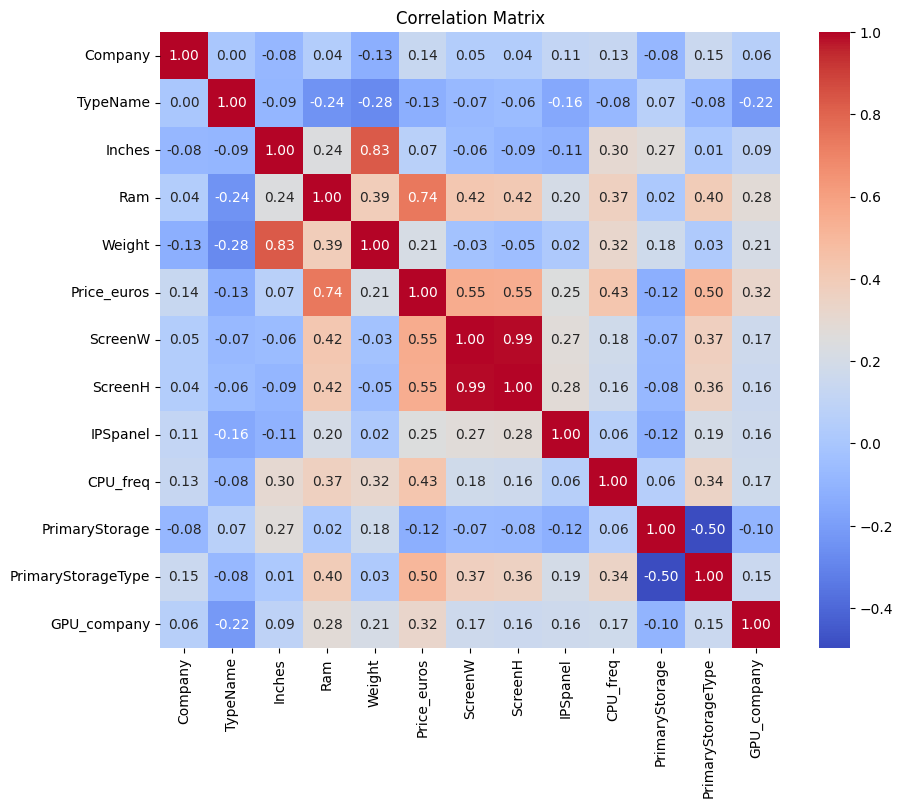

In [ ]:
cor_mat= ds.corr()
print(cor_mat)
plt.figure(figsize=(10,8))
sns.heatmap(cor_mat,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show();

In [ ]:
correlation_matrix['TypeName'].sort_values(ascending=False)

,TypeName
TypeName,1.000000
PrimaryStorage,0.065829
Company,0.001249
ScreenH,-0.059531
ScreenW,-0.074689
PrimaryStorageType,-0.076184
CPU_freq,-0.081294
Inches,-0.089901
Price_euros,-0.125417
IPSpanel,-0.156556


 From above, it is evident that the feature "Weight" has the most impact on this model

In [ ]:
P = ds.drop('TypeName', axis = 1)
Q = ds['TypeName']

In [ ]:
from sklearn.model_selection import train_test_split
P_train, P_test, Q_train, Q_test = train_test_split(P, Q, test_size = 0.2, random_state = 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(P_train)

P_train_scaled = scaler.transform(P_train)
P_test_scaled = scaler.transform(P_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(min_samples_leaf=5)
dt_model.fit(P_train_scaled, Q_train)

DecisionTreeClassifier(min_samples_leaf=5)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
Q_train_pred_dt = dt_model.predict(P_train_scaled)
Q_test_pred_dt = dt_model.predict(P_test_scaled)

train_accuracy_dt = accuracy_score(Q_train, Q_train_pred_dt)
test_accuracy_dt = accuracy_score(Q_test, Q_test_pred_dt)

train_cr_dt = classification_report(Q_train, Q_train_pred_dt)
test_cr_dt = classification_report(Q_test, Q_test_pred_dt)

print("Training Accuracy:", train_accuracy_dt)
print("Test Accuracy:", test_accuracy_dt)
print()
print()
print("Training Classification Report:\n",train_cr_dt )
print("Test Classification Report:\n",test_cr_dt)

Training Accuracy: 0.8803921568627451
Test Accuracy: 0.7058823529411765


Training Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72        85
           1       0.89      0.93      0.91       161
           2       0.77      0.53      0.62        19
           3       0.91      0.94      0.92       585
           4       0.85      0.80      0.82       152
           5       1.00      0.28      0.43        18

    accuracy                           0.88      1020
   macro avg       0.85      0.70      0.74      1020
weighted avg       0.88      0.88      0.88      1020

Test Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.30      0.38        30
           1       0.73      0.81      0.77        43
           2       0.60      0.75      0.67         4
           3       0.77      0.86      0.81       129
           4       0.54      0.55      0.55       

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(min_samples_leaf=5, n_estimators=3)
rf_model.fit(P_train_scaled, Q_train)


RandomForestClassifier(min_samples_leaf=5, n_estimators=3)

In [ ]:
Q_train_pred_rf = rf_model.predict(P_train_scaled)
Q_test_pred_rf = rf_model.predict(P_test_scaled)


train_accuracy_rf = accuracy_score(Q_train, Q_train_pred_dt)
test_accuracy_rf = accuracy_score(Q_test, Q_test_pred_dt)

train_cr_dt = classification_report(Q_train, Q_train_pred_dt)
test_cr_dt = classification_report(Q_test, Q_test_pred_dt)

print("Training Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print()
print()
print("Training Classification Report:\n",train_cr_dt )
print("Test Classification Report:\n",test_cr_dt)

Training Accuracy: 0.8803921568627451
Test Accuracy: 0.7058823529411765


Training Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72        85
           1       0.89      0.93      0.91       161
           2       0.77      0.53      0.62        19
           3       0.91      0.94      0.92       585
           4       0.85      0.80      0.82       152
           5       1.00      0.28      0.43        18

    accuracy                           0.88      1020
   macro avg       0.85      0.70      0.74      1020
weighted avg       0.88      0.88      0.88      1020

Test Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.30      0.38        30
           1       0.73      0.81      0.77        43
           2       0.60      0.75      0.67         4
           3       0.77      0.86      0.81       129
           4       0.54      0.55      0.55       

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AB_model = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=5),random_state=2)
AB_model.fit(P_train_scaled, Q_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=5),
                   random_state=2)

In [ ]:
Q_train_pred_AB = AB_model.predict(P_train_scaled)
Q_test_pred_AB = AB_model.predict(P_test_scaled)

train_accuracy_ab = accuracy_score(Q_train, Q_train_pred_AB)
test_accuracy_ab = accuracy_score(Q_test, Q_test_pred_AB)

train_cr_ab = classification_report(Q_train, Q_train_pred_AB)
test_cr_ab = classification_report(Q_test, Q_test_pred_AB)

print("Training Accuracy:", train_accuracy_ab)
print("Test Accuracy:", test_accuracy_ab)
print()
print()
print("Training Classification Report:\n",train_cr_ab )
print("Test Classification Report:\n",test_cr_ab)

Training Accuracy: 1.0
Test Accuracy: 0.803921568627451


Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00       161
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00       585
           4       1.00      1.00      1.00       152
           5       1.00      1.00      1.00        18

    accuracy                           1.00      1020
   macro avg       1.00      1.00      1.00      1020
weighted avg       1.00      1.00      1.00      1020

Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.33      0.48        30
           1       0.84      0.86      0.85        43
           2       1.00      0.75      0.86         4
           3       0.81      0.95      0.87       129
           4       0.70      0.79      0.74        38
           5

Answer_f : From above, It is evident that, Decision Tree and Random Forest model performs same. So, we can choose anyone between them. However, It would be good idea to use Decision Tree classifier, as it requires less computation.